# Desafio Cientista de Dados - Plataforma de Aluguéis Temporários

Bem-vindo ao meu projeto de previsão de preços de imóveis! Neste trabalho além de fazer uma análise exploratória, desenvolvi um modelo de Regressão Linear para prever os preços de aluguel de imóveis em Nova York. Com o objetivo de explorar as variáveis que influenciam os preços, aplicar um modelo preditivo e apresentar resultados sobre a precificação na plataforma.


## Vizualização dos dados

Antes de colocar a mão na massa, vamos verificar se está tudo certinho com o nosso dataset.


### Importação dos dados

In [ ]:

# Importando as bibliotecas necessárias
!pip install numpy pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Arquivo CSV direto do Google Drive
url = "https://drive.google.com/uc?id=1aRl4OYLDlv8nPYMfNZ30huAd4GQiq6gx"

# Leitura do arquivo CSV
df = pd.read_csv(url)

# Exibindo dataframe
df.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:

df.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## Análise exploratória dos dados (EDA)

**Agora vamos explorar a fundo os dados, para que possamos enteder quais serão as melhores maneiras de aproveitá los**.

In [ ]:

# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [ ]:

# dataset apenas com colunas com valores numericos
df_num = df.select_dtypes(include=['float64', 'int64'])
# correlação das colunas
df_num.corr()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.588282,-0.003178,0.090896,0.010618,-0.013235,-0.319782,0.291810,0.133274,0.085541
host_id,0.588282,1.000000,0.020199,0.127049,0.015309,-0.017370,-0.140113,0.296406,0.154951,0.203535
latitude,-0.003178,0.020199,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.010168,0.019517,-0.010926
longitude,0.090896,0.127049,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.145941,-0.114713,0.082751
price,0.010618,0.015309,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833
minimo_noites,-0.013235,-0.017370,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320
numero_de_reviews,-0.319782,-0.140113,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047
reviews_por_mes,0.291810,0.296406,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009421,0.185835
calculado_host_listings_count,0.133274,0.154951,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225711
disponibilidade_365,0.085541,0.203535,-0.010926,0.082751,0.081833,0.144320,0.172047,0.185835,0.225711,1.000000


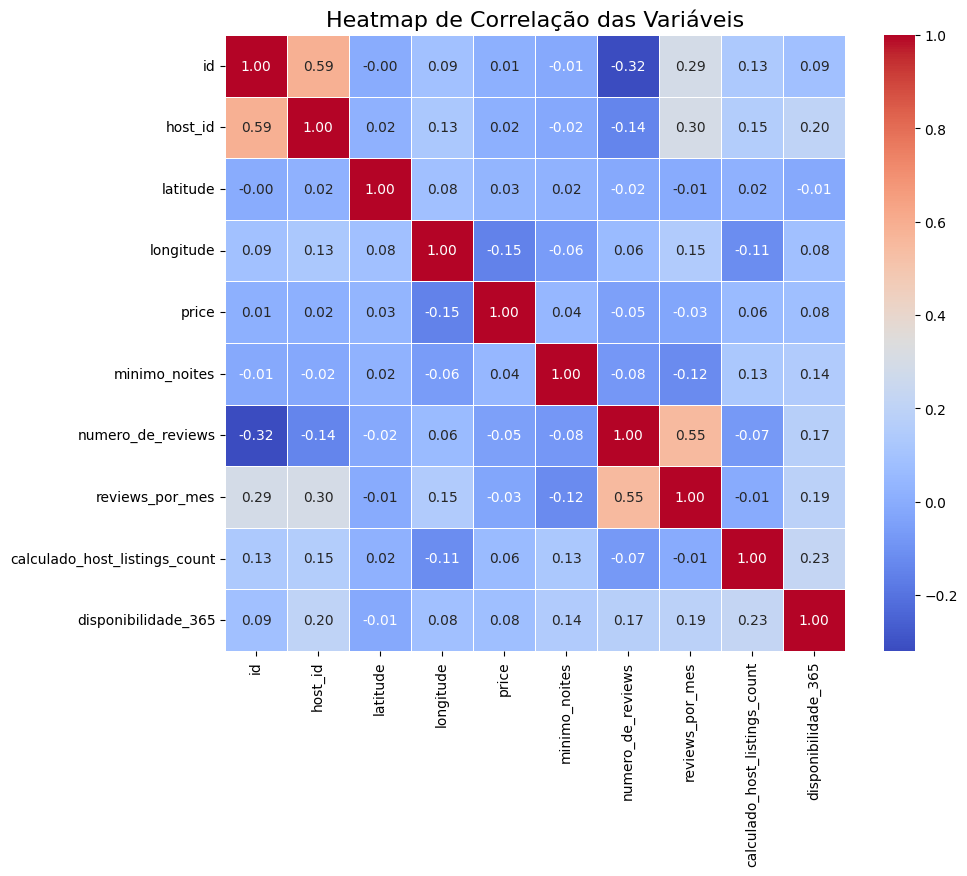

In [ ]:

# Calculando a matriz de correlação
correlation_matrix = df_num.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlação das Variáveis", fontsize=16)
plt.show()


**Aqui podemos vê que aguns dados possuem uma relação muito proxima, mas em sua maioria não há uma relaçao forte.**

In [ ]:

# Informaçoes das colunas com apenas numeros
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   host_id                        48894 non-null  int64  
 2   latitude                       48894 non-null  float64
 3   longitude                      48894 non-null  float64
 4   price                          48894 non-null  int64  
 5   minimo_noites                  48894 non-null  int64  
 6   numero_de_reviews              48894 non-null  int64  
 7   reviews_por_mes                38842 non-null  float64
 8   calculado_host_listings_count  48894 non-null  int64  
 9   disponibilidade_365            48894 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.7 MB


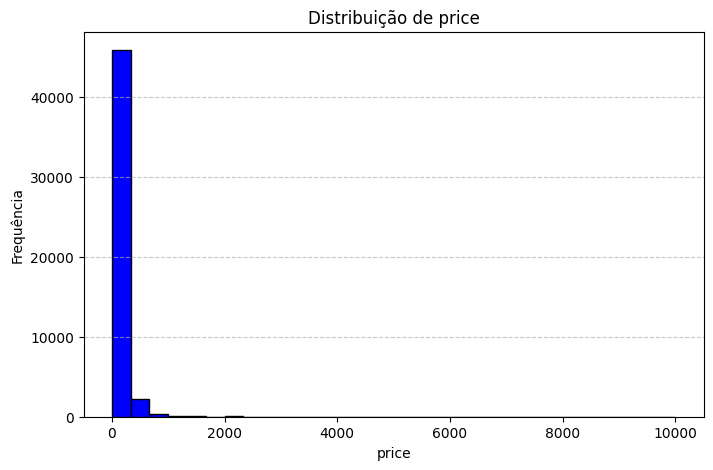

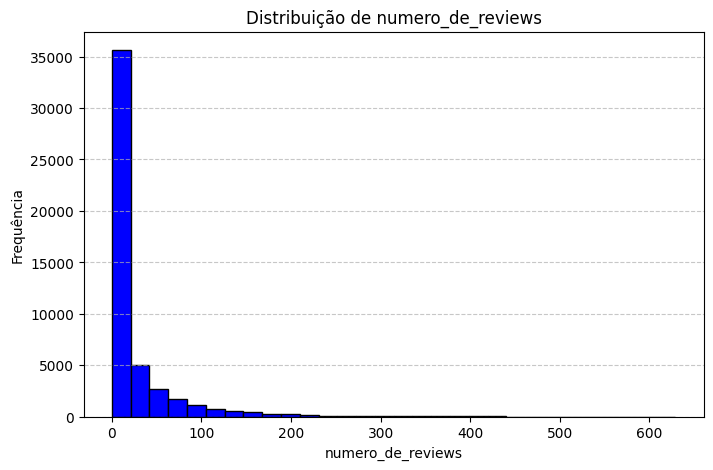

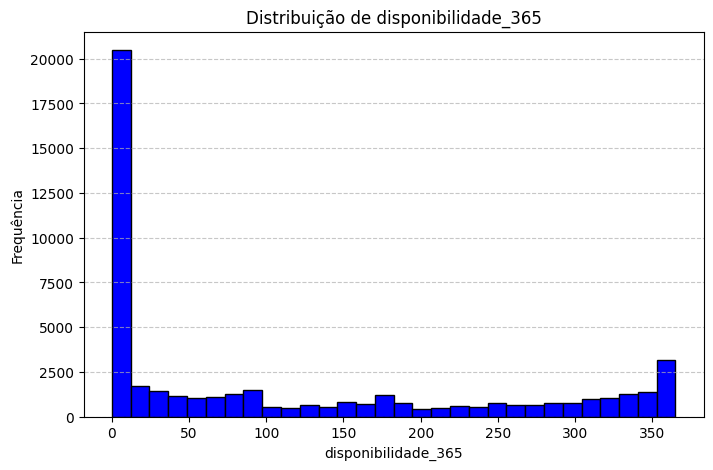

In [ ]:

# A distribuição das variaveis price, numero de reviews e disponivilidade
variaveis = ['price', 'numero_de_reviews', 'disponibilidade_365']

# Usando Loop para criar os histogramas
for var in variaveis:
    plt.figure(figsize=(8, 5))
    plt.hist(df_num[var], bins=30, edgecolor='black', color='blue')
    plt.title(f"Distribuição de {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

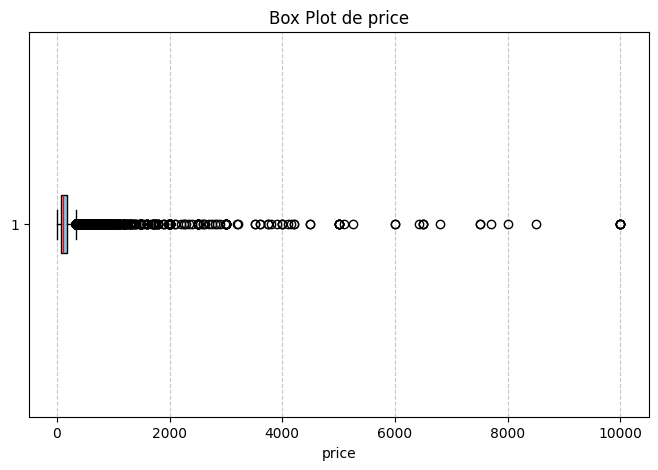

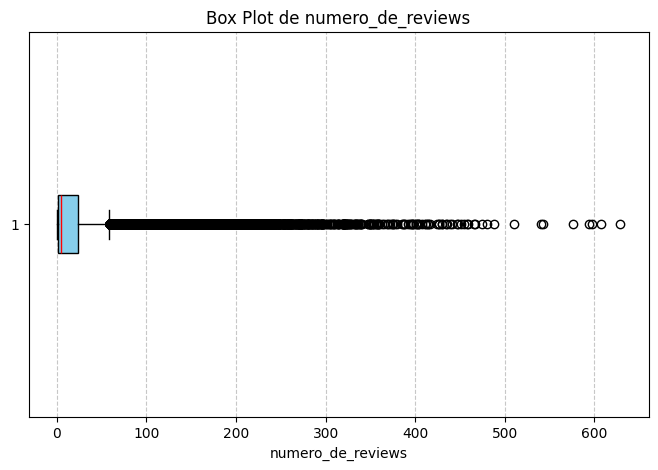

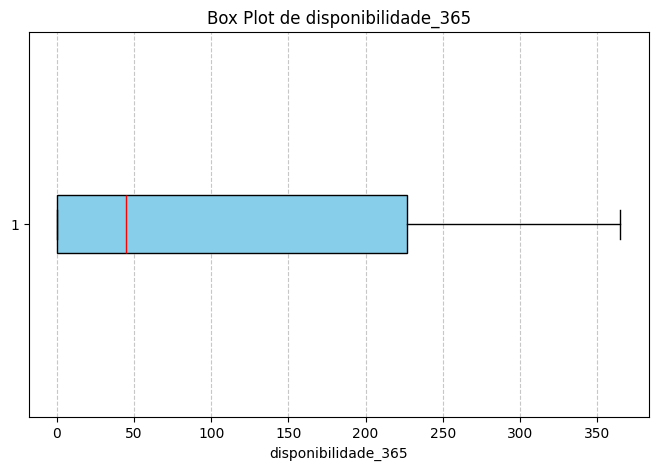

In [ ]:

# Em Boxplot
for var in variaveis:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[var], vert=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='pink'))
    plt.title(f"Box Plot de {var}")
    plt.xlabel(var)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

### Entedendo as Relações da coluna preço com as outras


Como o objetivo principal é fazer um modelo voltado para encontrar o preço, vamos entender como a coluna de preço se relacionar com as outras colunas.

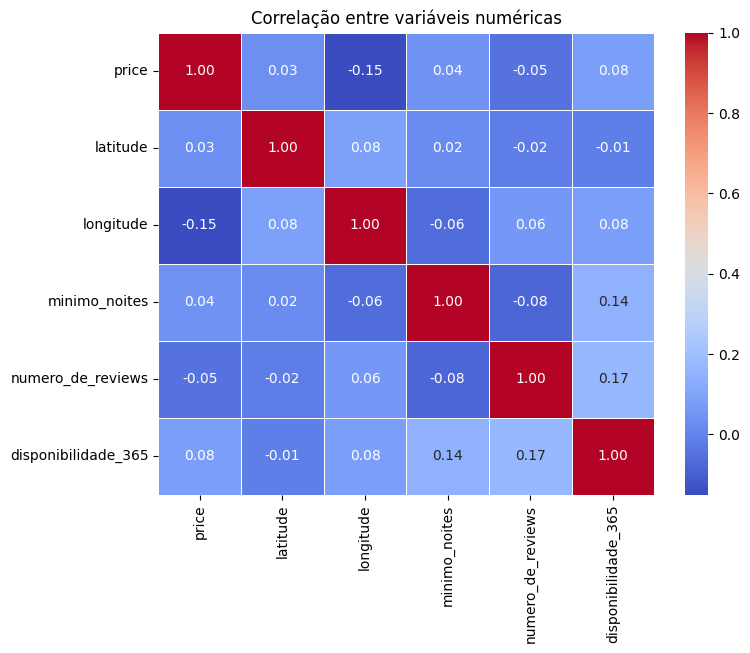

In [ ]:

# variaveis que podem ter alguma relação mais proporcional com o preço
df_var = df[['price', 'latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']]

# Correlação entre as variáveis
corr = df_var.corr()

# Gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre variáveis numéricas')
plt.show()


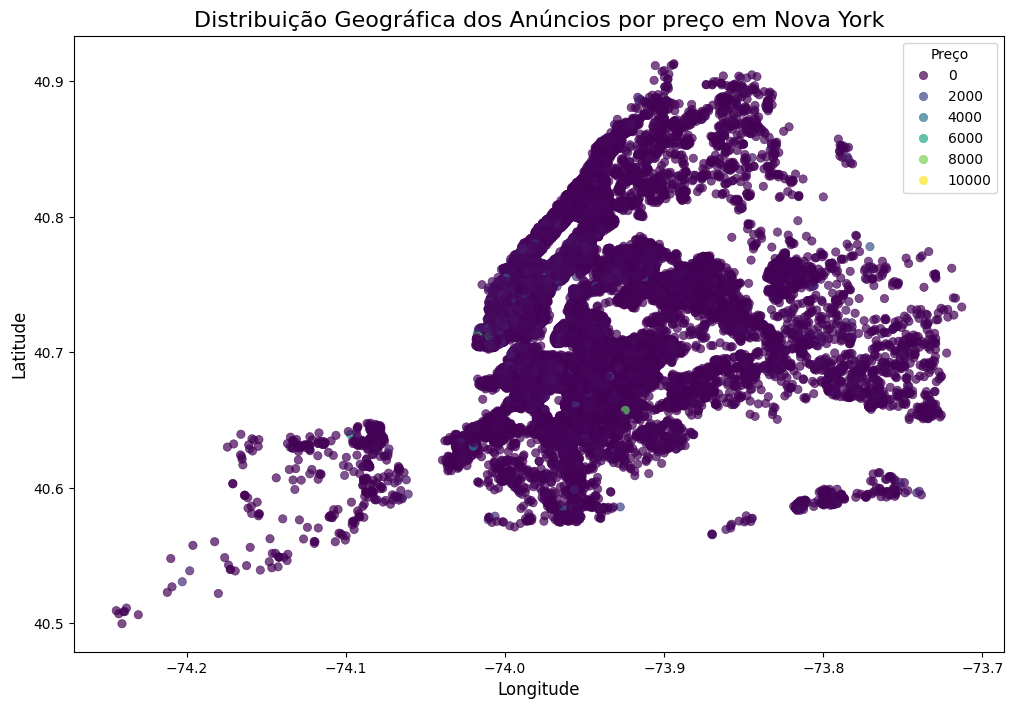

In [ ]:

# Entedendo a distribuição geográfica dos preços
# Tamanho da figura
plt.figure(figsize=(12, 8))

# Criando o 'scatter plot' com latitude e longitude, colorindo pelo preço
scatter = sns.scatterplot(
    x=df['longitude'],
    y=df['latitude'],
    hue=df['price'],
    palette="viridis",
    alpha=0.7,
    edgecolor=None
)

# Adicionando título e rótulos
plt.title("Distribuição Geográfica dos Anúncios por preço em Nova York", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Preço", loc='upper right')

# Gráfico
plt.show()

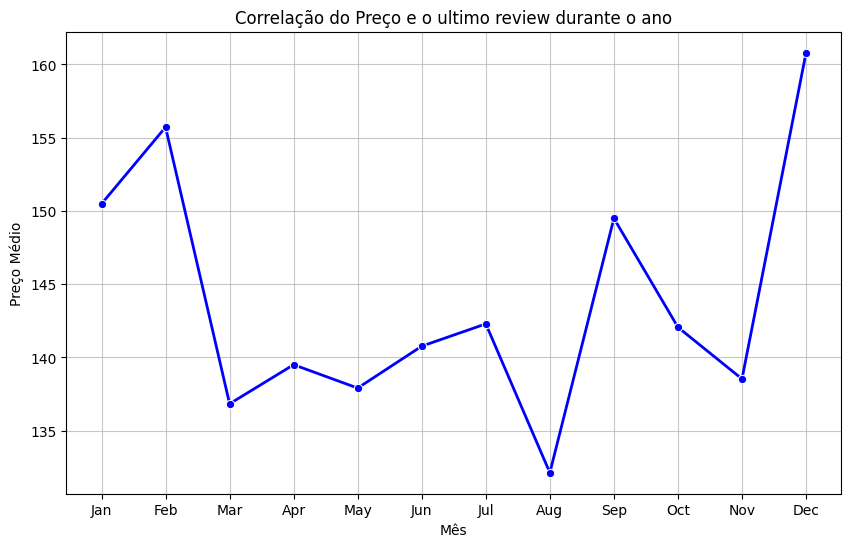

In [ ]:

# Convertendo a coluna 'ultima_review' para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

# Extraindo o mês da data da ultima review
df['month'] = df['ultima_review'].dt.month

# Agrupando por mês e calculando a média do preço
preco_medio_por_mes = df.groupby('month')['price'].mean()

# Gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=preco_medio_por_mes, marker='o', color='b', linewidth=2)
plt.title('Correlação do Preço e o ultimo review durante o ano')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

### Onde é a melhor opção para comprar?

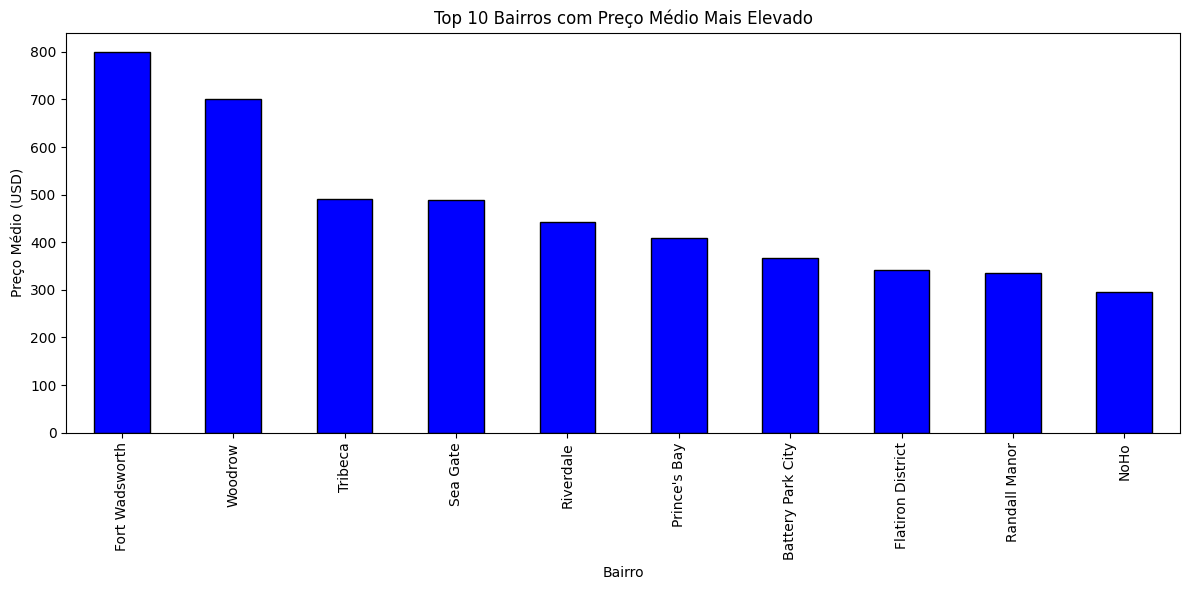

In [ ]:

# Preço médio por bairro
preco_medio_bairro = df.groupby('bairro')['price'].mean()

# Ordenando os bairros pelo preço médio de forma decrescente
preco_medio_bairro = preco_medio_bairro.sort_values(ascending=False)

# Crisndo o gráfico
plt.figure(figsize=(12, 6))
preco_medio_bairro.head(10).plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 Bairros com Preço Médio Mais Elevado")
plt.xlabel('Bairro')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=90)

# Ajuste para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

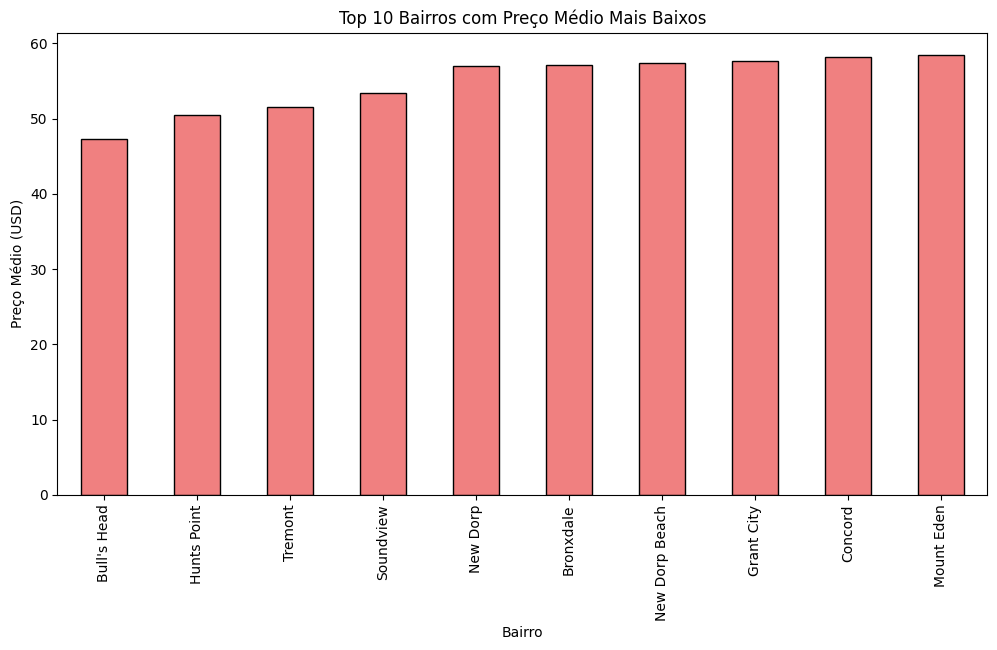

In [ ]:

# Para quem quer os preços mais baixos:
plt.figure(figsize=(12, 6))
preco_medio_bairro.nsmallest(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top 10 Bairros com Preço Médio Mais Baixos")
plt.xlabel('Bairro')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=90)
plt.show()


### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

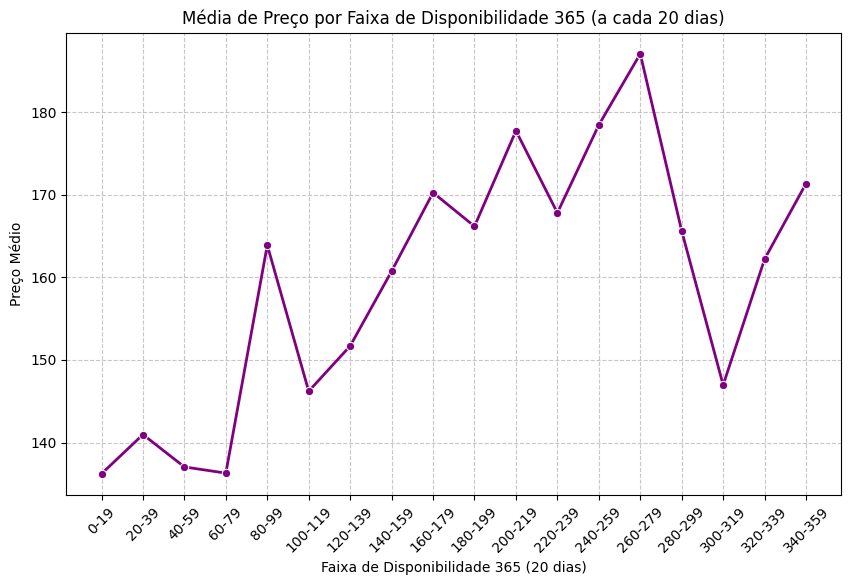

In [ ]:

# Criando faixas de 20 dias para a variável 'disponibilidade_365'
faixas_20_dias = pd.cut(df['disponibilidade_365'], bins=range(0, 366, 20), right=False, labels=[f'{i}-{i+19}' for i in range(0, 360, 20)])

# Calculando a média de preço para cada faixa de 20 dias
media_preco_por_faixa = df.groupby(faixas_20_dias, observed=False)['price'].mean()

# Gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x=media_preco_por_faixa.index, y=media_preco_por_faixa.values, marker='o', color='purple', linewidth=2)
plt.title('Média de Preço por Faixa de Disponibilidade 365 (a cada 20 dias)')
plt.xlabel('Faixa de Disponibilidade 365 (20 dias)')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


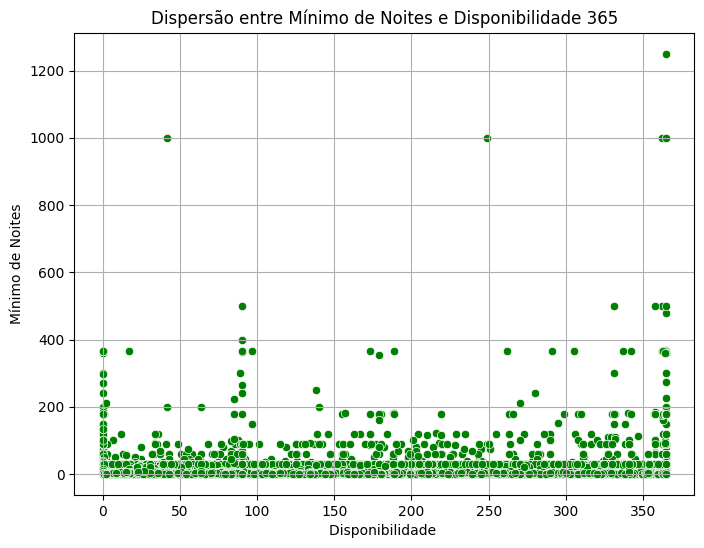

In [ ]:

# Criando gráfico de dispersão entre 'minimo_noites' e 'disponibilidade_365'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='disponibilidade_365', y='minimo_noites', color='green')
plt.title('Dispersão entre Mínimo de Noites e Disponibilidade 365')
plt.ylabel('Mínimo de Noites')
plt.xlabel('Disponibilidade ')
plt.grid(True)
plt.show()


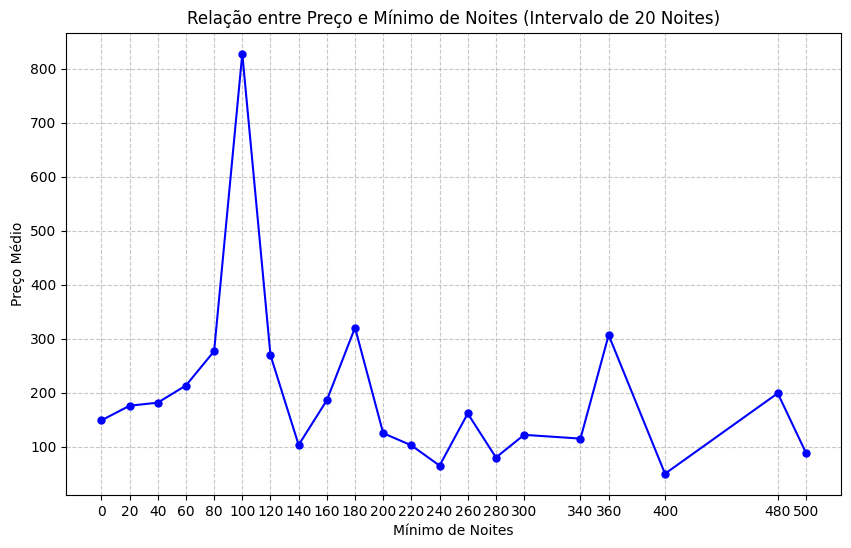

In [ ]:

# Limitando o mínimo de noites a 500 para enteder onde se consentrar a maior parte dos dados
df = df[df['minimo_noites'] <= 500]

# Agrupando os dados em faixas de 20 noites
df['faixa_minimo_noites'] = (df['minimo_noites'] // 20) * 20  # faixas com intervalo de 5 noites

# Calculando a média do preço para cada faixa de mínimo de noites
media_preco_por_faixa_noites = df.groupby('faixa_minimo_noites')['price'].mean()

# Gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_preco_por_faixa_noites.index, media_preco_por_faixa_noites, marker='o', color='b', linestyle='-', markersize=5)
plt.title('Relação entre Preço e Mínimo de Noites (Intervalo de 20 Noites)')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço Médio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(media_preco_por_faixa_noites.index)
plt.show()


### O nome interfere?

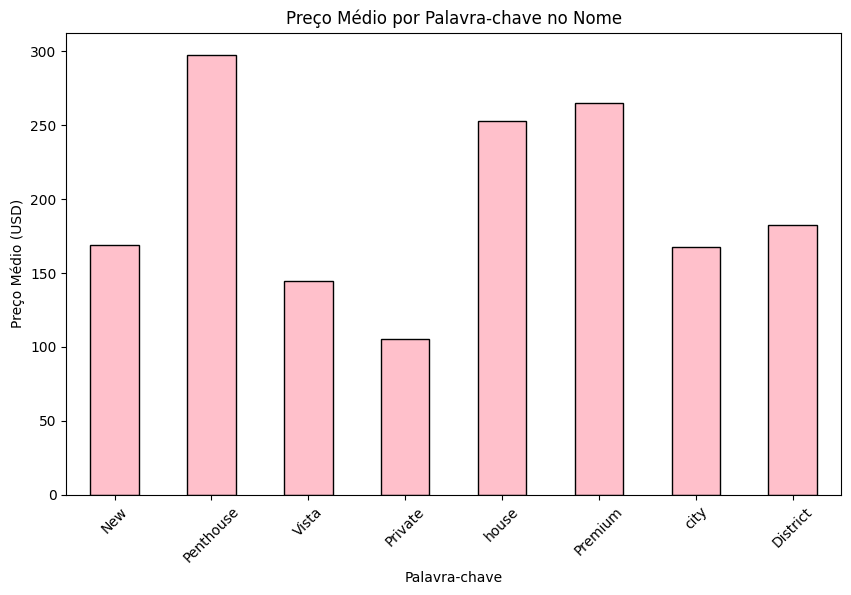

In [ ]:

# Palavras-chave
palavras_chave = ['New', 'Penthouse', 'Vista', 'Private', 'house', 'Premium', 'city', 'District']

# Calculando a média de preço para as propriedades que possuem essas palavras-chave
preco_medio_por_palavra = {}
for palavra in palavras_chave:
    filtro = df['nome'].str.contains(palavra, case=False, na=False)
    preco_medio_por_palavra[palavra] = df.loc[filtro, 'price'].mean()

# Convertendo de DataFrame para visualização
preco_medio_df = pd.DataFrame.from_dict(preco_medio_por_palavra, orient='index', columns=['Preço Médio'])

# Gráfico de barras
plt.figure(figsize=(10, 6))
preco_medio_df['Preço Médio'].plot(kind='bar', color='pink', edgecolor='black')
plt.title('Preço Médio por Palavra-chave no Nome')
plt.xlabel('Palavra-chave')
plt.ylabel('Preço Médio em Dolares')
plt.xticks(rotation=45)
plt.show()


Podemos observar que sim! há nomes que apresentão-se mais caros, mas como não temos a correlação das colunas possa ser que não interfira muito o resultado.

## Limpeza e Preparação  dos dados


A realização da limpeza e preparação dos dados é um passo muito importante, se for mal feita o resultado dificilmente será bom.

In [ ]:

# Há linhas duplicadas?
df.duplicated().sum()

0

In [ ]:

# verificando se há dados NULL no dataset
df.isnull().sum()

,0
id,0
nome,15
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:

# Para não perder muitos dados por conta de valores nulos, decide não deletar as linhas e sim preencher com a função .fillna()
# Dados NULL podem prejudicar nossa analise
df = df.fillna(0)

In [ ]:

# Feature Engineering
# Valor por Noite
df['custo_por_noite'] = df['price'] / df['minimo_noites']
df['custo_por_noite'] = df['custo_por_noite'].replace([float('inf'), -float('inf')], 0)

# Popularidade do Bairro
popularidade_bairro = df.groupby('bairro')['numero_de_reviews'].sum()
df['popularidade_bairro'] = df['bairro'].map(popularidade_bairro)

# Densidade de Anúncios por Bairro
anuncios_por_bairro = df['bairro'].value_counts()
df['densidade_bairro'] = df['bairro'].map(anuncios_por_bairro)

In [ ]:

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,...,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,month,faixa_minimo_noites,custo_por_noite,popularidade_bairro,densidade_bairro
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21 00:00:00,0.38,2,355,5.0,0,225.000000,19444,1545
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,0,0.00,1,365,0.0,0,50.000000,75960,2657
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05 00:00:00,4.64,1,194,7.0,0,89.000000,14586,572
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19 00:00:00,0.10,1,0,11.0,0,8.000000,36446,1117
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,74,2019-06-22 00:00:00,0.59,1,129,6.0,0,66.666667,4535,485


In [ ]:

# como o dataframe ficou?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48889 entries, 0 to 48893
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48889 non-null  int64  
 1   nome                           48889 non-null  object 
 2   host_id                        48889 non-null  int64  
 3   host_name                      48889 non-null  object 
 4   bairro_group                   48889 non-null  object 
 5   bairro                         48889 non-null  object 
 6   latitude                       48889 non-null  float64
 7   longitude                      48889 non-null  float64
 8   room_type                      48889 non-null  object 
 9   price                          48889 non-null  int64  
 10  minimo_noites                  48889 non-null  int64  
 11  numero_de_reviews              48889 non-null  int64  
 12  ultima_review                  48889 non-null  obje

### One hot

In [ ]:

# Transformando dados categóricos em dados numéricos

# Colunas categóricas para aplicar One-Hot Encoding
colunas_categoricas = ['bairro_group', 'room_type']

# Aplicando One-Hot Encoding e apos concatenar com o DataFrame original
df_one_hot = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Exibindo o DataFrame
df_one_hot.head()

,id,nome,host_id,host_name,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,...,faixa_minimo_noites,custo_por_noite,popularidade_bairro,densidade_bairro,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Private room,room_type_Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,0,225.000000,19444,1545,False,True,False,False,False,False
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,0,50.000000,75960,2657,False,True,False,False,True,False
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,0,89.000000,14586,572,True,False,False,False,False,False
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0,8.000000,36446,1117,False,True,False,False,False,False
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,...,0,66.666667,4535,485,False,True,False,False,False,False


In [ ]:

df = df_one_hot.select_dtypes(include=['float64', 'int64', 'bool'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48889 entries, 0 to 48893
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48889 non-null  int64  
 1   host_id                        48889 non-null  int64  
 2   latitude                       48889 non-null  float64
 3   longitude                      48889 non-null  float64
 4   price                          48889 non-null  int64  
 5   minimo_noites                  48889 non-null  int64  
 6   numero_de_reviews              48889 non-null  int64  
 7   reviews_por_mes                48889 non-null  float64
 8   calculado_host_listings_count  48889 non-null  int64  
 9   disponibilidade_365            48889 non-null  int64  
 10  month                          48889 non-null  float64
 11  faixa_minimo_noites            48889 non-null  int64  
 12  custo_por_noite                48889 non-null  floa

## Construção do Modelo

**Eu escolhi o modelo de Regressão Linear porque ele é simples, eficiente e adequado para problemas de previsão contínua, como o preço dos imóveis. Além disso, ele permite interpretar a relação entre as variáveis explicativas e o alvo, ajudando a entender quais fatores influenciam mais o preço**

### Bibliotecas

In [ ]:

# bibliotecas necessárias para o Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle #pkl

### Finalizando os dados

In [ ]:

# Variáveis preditoras (X) e a variável alvo (y)
x = df.drop(columns=['price', 'custo_por_noite'])   # Removendo colunas alvo
y = df['price']  # A variável alvo é o preço

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalizando os dados (opcional, caso necessário)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo e Pkl

In [ ]:

# Criando o modelo de Regressão Linear
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train_scaled, y_train)

with open('modelo.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)

### Avaliação

In [ ]:

# Fazendo as previsões
y_pred = modelo.predict(X_test_scaled)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
r2 = r2_score(y_test, y_pred)  # R² (coeficiente de determinação)

# Exibindo os resultados
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')


MSE (Erro Quadrático Médio): 35708.47193201469
R² (Coeficiente de Determinação): 0.13051245921202903


 O MSE foi de 35.708 e o R² ficou em 0,13, indicando que o modelo não conseguiu explicar bem a variabilidade do preço. Reconheço que ainda estou aprendendo e que, com o tempo e prática, serei capaz de criar modelos mais robustos e precisos.

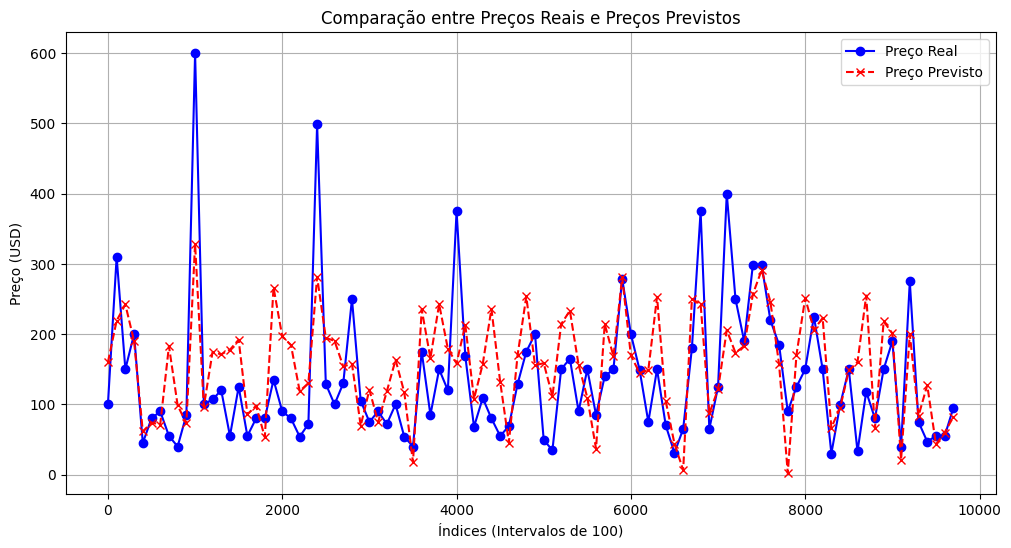

In [ ]:


# Criando intervalos de 100 nos índices
intervalos = range(0, len(y_test), 100)

# Convertendo os dados para listas, para garantir compatibilidade com os índices
y_test_list = y_test.values.tolist()
y_pred_list = y_pred.tolist()

# Filtrando os valores reais e previstos nos intervalos
y_test_interval = [y_test_list[i] for i in intervalos]
y_pred_interval = [y_pred_list[i] for i in intervalos]

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(intervalos, y_test_interval, label='Preço Real', color='blue', marker='o')
plt.plot(intervalos, y_pred_interval, label='Preço Previsto', color='red', linestyle='--', marker='x')
plt.title('Comparação entre Preços Reais e Preços Previstos')
plt.xlabel('Índices (Intervalos de 100)')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()


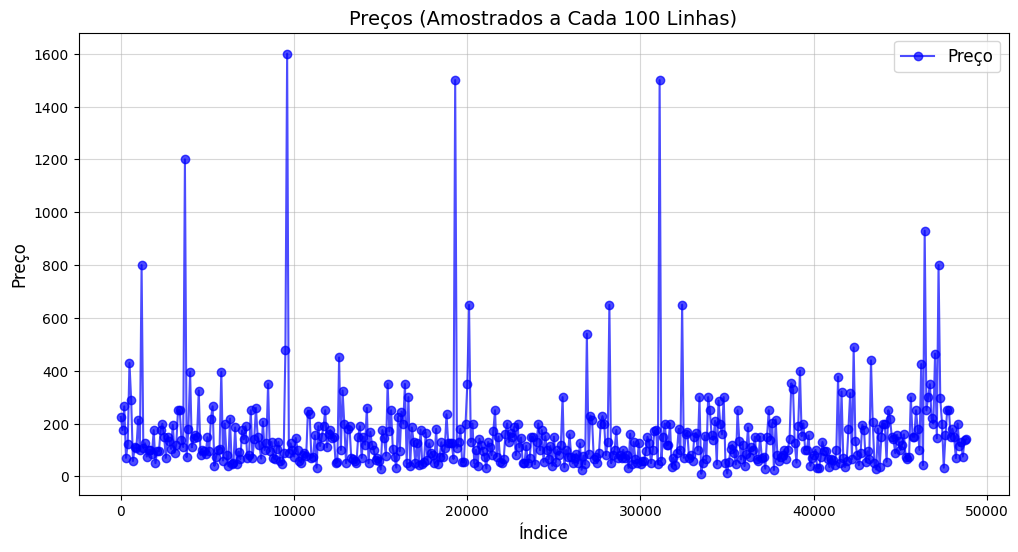

In [ ]:

# Entendendo como o preço de comporta
# Selecionando valores de df['price'] com intervalos de 100
price_sample = df2['price'][::100]  # Pegando a cada 100 linhas

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))

# Plotando os preços
plt.plot(price_sample.index, price_sample.values, label='Preço', color='blue', linestyle='-', marker='o', alpha=0.7)

# Adicionando título e legendas
plt.title('Preços (com intevalos a cada 100 Linhas)', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=12)
plt.show()


### Testando no Exemplo

In [ ]:

# Exemplo fornecido
exemplo = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

# Carregando o modelo treinado
with open('modelo.pkl', 'rb') as modelo_file:
    modelo = pickle.load(modelo_file)

# Transformar o exemplo em DataFrame
exemplo_df = pd.DataFrame([exemplo])

# Os exemplos devem ser transformadas como no treino
exemplo_df_encoded = pd.get_dummies(exemplo_df, columns=['bairro_group', 'room_type'], drop_first=True)

# Garantindo que as colunas estejam no mesmo formato (mesmas colunas que o treino)
exemplo_df_encoded = exemplo_df_encoded.reindex(columns=x.columns, fill_value=0)

# Normalizarção
scaler = StandardScaler()
exemplo_df_scaled = scaler.fit_transform(exemplo_df_encoded)

# Realizar a previsão com o modelo treinado
previsao_preco = modelo.predict(exemplo_df_scaled)

print(f'Preço previsto: {previsao_preco[0]:.2f}')


Preço previsto: 154.34


### Agradecimento


**Quero agradecer pela oportunidade de participar deste processo seletivo. A experiência de responder às questões e desafios propostos foi valioso e desafiador, contribuiu para o meu aprendizado. Este processo me permitiu expandir meus conhecimentos e habilidades, ao mesmo tempo em que me motiva a continuar me aprimorando. Obrigado novamente pela experiência e pelo tempo que será dedicado à avaliação do meu trabalho. :)**
